## Use-case 5: Machine Learning Model

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import datetime as datetime 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from tqdm import tqdm
print(pd.__version__)

1.4.4


In [2]:
df = pd.read_csv('banijay_op1data_content_ratings_twitter.csv')

In [3]:
df.columns

Index(['date', 'program', 'station', 'target_group', 'broadcast_type',
       'ratings_type', 'kdh%', 'kdh000', 'zadl%', 'date_time', 'date.1',
       'hosts', 'id', 'length', 'start', 'end', 'title', 'summary', 'keywords',
       'show_id', 'fragment', 'date_time_start', 'date_time_end',
       'created_at_date', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'author.public_metrics.followers_count',
       'engagement%'],
      dtype='object')

In [4]:
df["kdh000"].head(5)

0    1238.251453
1     206.903827
2    1278.707169
3     129.497246
4      25.412753
Name: kdh000, dtype: float64

In [5]:
df

,date,program,station,target_group,broadcast_type,ratings_type,kdh%,kdh000,zadl%,date_time,...,fragment,date_time_start,date_time_end,created_at_date,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.public_metrics.followers_count,engagement%
0,2020-01-06,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitzenddag,7.746334,1238.251453,26.170016,2020-01-06 22:24:00,...,1,2020-01-06 22:23:38,2020-01-06 22:38:09,2020-01-06,64,109,249,45,337078.0,0.138544
1,2020-01-06,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitgesteld,1.294362,206.903827,28.687917,2020-01-06 22:24:00,...,1,2020-01-06 22:23:38,2020-01-06 22:38:09,2020-01-06,64,109,249,45,337078.0,0.138544
2,2020-01-06,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,7.999419,1278.707169,25.431252,2020-01-06 22:24:00,...,1,2020-01-06 22:23:38,2020-01-06 22:38:09,2020-01-06,64,109,249,45,337078.0,0.138544
3,2020-01-06,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitzenddag,3.536244,129.497246,17.654748,2020-01-06 22:24:00,...,1,2020-01-06 22:23:38,2020-01-06 22:38:09,2020-01-06,64,109,249,45,337078.0,0.138544
4,2020-01-06,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitgesteld,0.693958,25.412753,13.865542,2020-01-06 22:24:00,...,1,2020-01-06 22:23:38,2020-01-06 22:38:09,2020-01-06,64,109,249,45,337078.0,0.138544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071865,2022-09-16,op1,npo1,m_6plus_jr,live/prerecorded uitzendingen,uitgesteld,1.049226,84.294827,22.466714,2022-09-16 23:19:00,...,5,2022-09-16 23:07:03,2022-09-16 23:20:16,2022-09-16,46,165,102,18,337078.0,0.098197
1071866,2022-09-16,op1,npo1,m_6plus_jr,live/prerecorded uitzendingen,totaal,5.813197,467.032232,29.030958,2022-09-16 23:19:00,...,5,2022-09-16 23:07:03,2022-09-16 23:20:16,2022-09-16,46,165,102,18,337078.0,0.098197
1071867,2022-09-16,op1,npo1,v_6plus_jr,live/prerecorded uitzendingen,uitzenddag,3.649362,297.532449,21.410177,2022-09-16 23:19:00,...,5,2022-09-16 23:07:03,2022-09-16 23:20:16,2022-09-16,46,165,102,18,337078.0,0.098197
1071868,2022-09-16,op1,npo1,v_6plus_jr,live/prerecorded uitzendingen,uitgesteld,0.561534,45.781892,11.490835,2022-09-16 23:19:00,...,5,2022-09-16 23:07:03,2022-09-16 23:20:16,2022-09-16,46,165,102,18,337078.0,0.098197


In [6]:
df.shape

(1071870, 30)

In [7]:
df.dtypes

date                                      object
program                                   object
station                                   object
target_group                              object
broadcast_type                            object
ratings_type                              object
kdh%                                     float64
kdh000                                   float64
zadl%                                    float64
date_time                                 object
date.1                                    object
hosts                                     object
id                                        object
length                                    object
start                                     object
end                                       object
title                                     object
summary                                   object
keywords                                  object
show_id                                   object
fragment            

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
kdh%,1071269.0,2.581693,3.216787,0.000000,0.354070,1.181009,4.082877,24.057490
kdh000,1071269.0,200.270711,295.607760,0.000000,9.212239,58.787415,314.843235,2166.124546
zadl%,1030336.0,16.588384,12.033886,0.000000,8.350301,15.799317,23.676774,100.000000
fragment,1071870.0,2.579081,1.286983,1.000000,1.000000,2.000000,4.000000,9.000000
public_metrics.retweet_count,1071870.0,123.538022,153.460355,9.000000,53.000000,82.000000,135.000000,1975.000000
public_metrics.reply_count,1071870.0,323.213160,337.622168,24.000000,119.000000,209.000000,380.000000,2953.000000
public_metrics.like_count,1071870.0,456.672619,558.417189,44.000000,186.000000,286.000000,468.000000,6550.000000
public_metrics.quote_count,1071870.0,99.051471,103.919934,3.000000,33.000000,60.000000,122.000000,772.000000
author.public_metrics.followers_count,1071870.0,337078.000000,0.000000,337078.000000,337078.000000,337078.000000,337078.000000,337078.000000
engagement%,1071870.0,0.297402,0.295189,0.028183,0.125194,0.200250,0.350661,3.012062


In [9]:
df["kdh000"].isna().sum()

601

In [10]:
df["public_metrics.retweet_count"] = df["public_metrics.retweet_count"].replace(",", ".").astype(float)

df["public_metrics.reply_count"] = df["public_metrics.reply_count"].replace(",", ".").astype(float)

df["public_metrics.like_count"] = df["public_metrics.like_count"].replace(",", ".").astype(float)

df.dropna(subset = "kdh000", inplace = True)

In [11]:
df.shape

(1071269, 30)

In [12]:
x = df[['public_metrics.retweet_count', 'author.public_metrics.followers_count']]
y = df['kdh000']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
X_train

,public_metrics.retweet_count,author.public_metrics.followers_count
434099,51.0,337078.0
1066975,75.0,337078.0
882964,54.0,337078.0
254481,114.0,337078.0
112075,118.0,337078.0
...,...,...
110268,136.0,337078.0
259779,103.0,337078.0
131932,100.0,337078.0
671756,56.0,337078.0


In [15]:
y_train

434099     490.442473
1066975     32.435391
882964      14.024091
254481     902.892853
112075      90.805370
              ...    
110268     217.778539
259779      11.060512
131932      50.560592
671756     295.126476
121958     178.144800
Name: kdh000, Length: 857015, dtype: float64

In [16]:
lr = LinearRegression()
log = LogisticRegression()

In [17]:
df2 = df
q = df2.dropna()

In [18]:
q.isna().sum().sum()

0

In [19]:
model = lr.fit(X_train, y_train)

In [20]:
y_pred = model.predict(X_test)

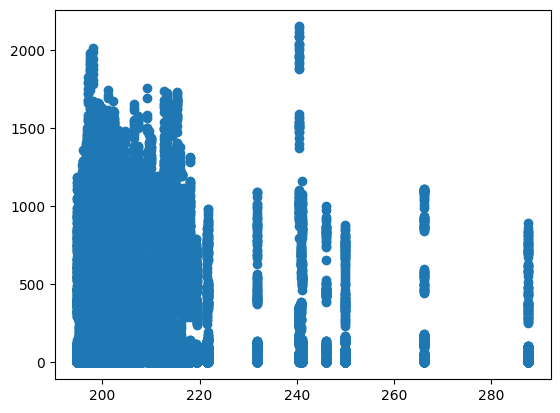

In [21]:
plt.scatter(y_pred, y_test)
plt.show()

In [22]:
score = model.score(X_test, y_test)
print("R^2: ", score)

R^2:  0.0005387185510220549


## Linear Regression: Retweet Count vs Like Count

In [23]:
x = df[['public_metrics.retweet_count']]  
y = df['public_metrics.like_count'] 

lr = LinearRegression()
lr.fit(x, y)

y_pred = lr.predict(x)

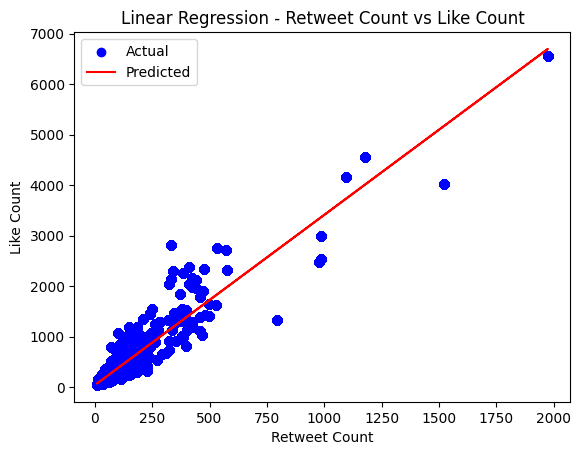

In [24]:
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred, color='red', label='Predicted')

plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.title('Linear Regression - Retweet Count vs Like Count')

plt.legend()

plt.show()

## Decision Tree Regression: Retweet Count vs Like Count

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred = dt.predict(x_test)

In [28]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 94.65004893536818


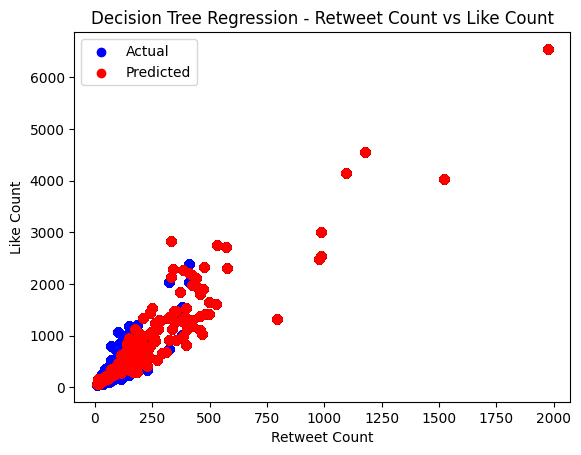

In [29]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')

plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.title('Decision Tree Regression - Retweet Count vs Like Count')

plt.legend()

plt.show()